# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [17]:
#list of cities to compare with print results below as cities being called from Weather API
cities

['hithadhoo',
 'kapaa',
 'kodiak',
 'hermanus',
 'beringovskiy',
 'prachin buri',
 'sitka',
 'punta arenas',
 'ushuaia',
 'san quintin',
 'new norfolk',
 'ixtapa',
 'beeville',
 'constitucion',
 'chuy',
 'carnarvon',
 'hasaki',
 'vanimo',
 'vanavara',
 'suntar',
 'urucara',
 'oktyabrskoye',
 'el alto',
 'saint-philippe',
 'albany',
 'busselton',
 'ranong',
 'ribeira grande',
 'tuktoyaktuk',
 'jamestown',
 'domna',
 'carbonia',
 'grande prairie',
 'tiksi',
 'mar del plata',
 'cabadiangan',
 'avarua',
 'sulangan',
 'alofi',
 'saskylakh',
 'fukue',
 'atuona',
 'arraial do cabo',
 'tumannyy',
 'toliary',
 'mataura',
 'dikson',
 'brae',
 'nanortalik',
 'barentsburg',
 'lebu',
 'rikitea',
 'port alfred',
 'wladyslawowo',
 'ubinskoye',
 'tuatapere',
 'kruisfontein',
 'warqla',
 'ostrovnoy',
 'labuhan',
 'severo-kurilsk',
 'inirida',
 'bluff',
 'beloha',
 'itarema',
 'banikoara',
 'airai',
 'leningradskiy',
 'saldanha',
 'mayo',
 'vahan',
 'rock sound',
 'east london',
 'lompoc',
 'ancud',
 'g

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{url}appid={weather_api_key}&units=imperial&q="

#lists to store city call info and counter to give city # as calls being done
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
clouds = []
wndspd = []
country = []
date = []
counter = 0

for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wndspd.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        counter +=1
        print(f"Processing City #{counter} | {city}")

    #catch errors and return skip message if city not found in Weather API call          
    except:
        print(f"City not found - skipping...")

Processing City #1 | hithadhoo
Processing City #2 | kapaa
Processing City #3 | kodiak
Processing City #4 | hermanus
Processing City #5 | beringovskiy
Processing City #6 | prachin buri
Processing City #7 | sitka
Processing City #8 | punta arenas
Processing City #9 | ushuaia
Processing City #10 | san quintin
Processing City #11 | new norfolk
Processing City #12 | ixtapa
Processing City #13 | beeville
Processing City #14 | constitucion
Processing City #15 | chuy
Processing City #16 | carnarvon
Processing City #17 | hasaki
Processing City #18 | vanimo
Processing City #19 | vanavara
Processing City #20 | suntar
Processing City #21 | urucara
Processing City #22 | oktyabrskoye
Processing City #23 | el alto
Processing City #24 | saint-philippe
Processing City #25 | albany
Processing City #26 | busselton
Processing City #27 | ranong
Processing City #28 | ribeira grande
Processing City #29 | tuktoyaktuk
Processing City #30 | jamestown
Processing City #31 | domna
Processing City #32 | carbonia
Pr

Processing City #239 | hualmay
Processing City #240 | verkhoyansk
Processing City #241 | havre
Processing City #242 | sorland
Processing City #243 | amahai
Processing City #244 | seoul
Processing City #245 | namibe
Processing City #246 | nicoya
Processing City #247 | moura
Processing City #248 | kupang
Processing City #249 | sistranda
City not found - skipping...
Processing City #250 | portland
Processing City #251 | cabo san lucas
Processing City #252 | tual
Processing City #253 | komsomolskiy
City not found - skipping...
Processing City #254 | cedar city
Processing City #255 | jabinyanah
Processing City #256 | bella vista
Processing City #257 | gold coast
Processing City #258 | pisco
Processing City #259 | fianarantsoa
Processing City #260 | namatanai
Processing City #261 | burns lake
Processing City #262 | sisimiut
Processing City #263 | kushima
Processing City #264 | sao filipe
Processing City #265 | olafsvik
Processing City #266 | canchungo
Processing City #267 | ponta do sol
Proc

Processing City #471 | martapura
Processing City #472 | katobu
Processing City #473 | ahtopol
Processing City #474 | toamasina
Processing City #475 | sept-iles
Processing City #476 | karang tengah
Processing City #477 | rivadavia
Processing City #478 | ahipara
Processing City #479 | sevasti
Processing City #480 | goure
Processing City #481 | ossora
Processing City #482 | bedesa
Processing City #483 | mangrol
Processing City #484 | hovd
Processing City #485 | kaitangata
Processing City #486 | chimbote
Processing City #487 | maningrida
Processing City #488 | vao
Processing City #489 | elyria
Processing City #490 | ligayan
Processing City #491 | portlethen
Processing City #492 | arman
City not found - skipping...
Processing City #493 | kavaratti
Processing City #494 | worthington
Processing City #495 | payo
City not found - skipping...
Processing City #496 | esmeraldas
Processing City #497 | riberalta
Processing City #498 | gizo
Processing City #499 | catuday
Processing City #500 | say
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
#aggregate weather data into new DF and count results - over 500 cities per HW req.
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wndspd,
    "Country": country,
    "Date": date
}

city_weather_df = pd.DataFrame(weather_dict)
city_weather_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [23]:
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.60,73.08,84.49,75,34,12.33,MV,1592281006
1,Kapaa,22.08,-159.32,82.40,69,75,16.11,US,1592281006
2,Saint Paul Harbor,57.79,-152.41,57.20,50,90,10.29,US,1592280852
3,Hermanus,-34.42,19.23,52.00,86,20,1.01,ZA,1592281006
4,Beringovskiy,63.05,179.32,45.23,81,17,6.51,RU,1592281007


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [63]:
#no cities over 100% humidity as shown below - skip this section except for exporting data to csv
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,19.338972,19.593711,68.152770,69.891986,49.505226,8.133084,1.592281e+09
std,33.389881,91.664295,14.432585,21.217781,38.520262,5.224381,1.329232e+02
min,-54.800000,-175.200000,26.600000,3.000000,0.000000,0.250000,1.592280e+09
25%,-8.182500,-63.165000,57.385000,59.000000,6.250000,4.392500,1.592281e+09
50%,22.850000,22.590000,68.000000,75.000000,42.500000,6.930000,1.592281e+09
75%,48.960000,105.350000,80.077500,86.000000,90.000000,11.165000,1.592281e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,28.590000,1.592281e+09


In [28]:
# Export the City_Data into a csv
city_weather_df.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

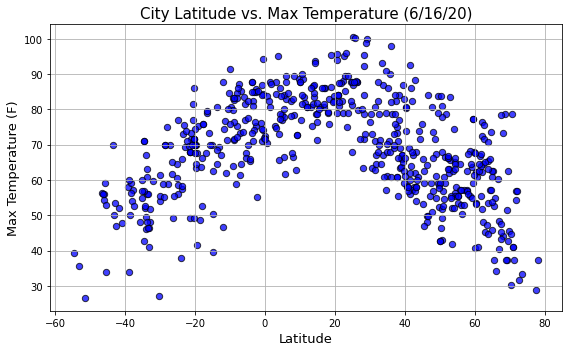

In [33]:
x_lat = city_weather_df['Lat']
y_temp = city_weather_df['Max Temp']
plt.figure(figsize=(8,5))
plt.scatter(x_lat, y_temp, marker="o", facecolors="blue", edgecolors="black",s=40, alpha=.75)
plt.title('City Latitude vs. Max Temperature (6/16/20)',fontsize=15)
plt.xlabel('Latitude',fontsize=13)
plt.ylabel('Max Temperature (F)',fontsize=13)
plt.grid()
plt.tight_layout()
plt.show()

This code builds a scatter plot showing the relationship between cities' latitude and their max temperature observed currently for date observed - this shows that lower latitudes (closer to the equator, 0 latitdue) observe higher temperatures than those at latitudes closer to the poles (-90,90).  Since it is summer in the Northern Hemisphere (lat > 0) it is currently warmest in those latitudes ranging from 0 to 40.

## Latitude vs. Humidity Plot

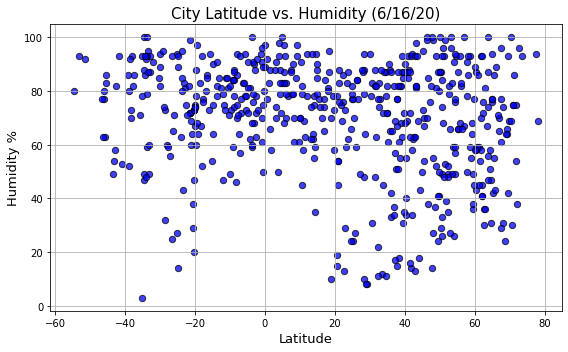

In [34]:
x_lat = city_weather_df['Lat']
y_hum = city_weather_df['Humidity']
plt.figure(figsize=(8,5))
plt.scatter(x_lat, y_hum, marker="o", facecolors="blue", edgecolors="black",s=40, alpha=.75)
plt.title('City Latitude vs. Humidity (6/16/20)',fontsize=15)
plt.xlabel('Latitude',fontsize=13)
plt.ylabel('Humidity %',fontsize=13)
plt.grid()
plt.tight_layout()
plt.show()

This code builds a scatter plot observing cities' latitude versus their humidity on the observation date.  we see humidities across most of its spectrum at latitudes above 20 degrees and below -20 degrees.  Most noteworty is the humidities closer to the equator don't go below 40% suggesting cities in that latitude maintain a higher humidity compared to cities further from the equator (though those areas can also have humidities greater than 40% obviously).  We're also seeing our greatest frequency of 100% humidities in the Northern Hemisphere likely due to it being Summer at this time of observation.

## Latitude vs. Cloudiness Plot

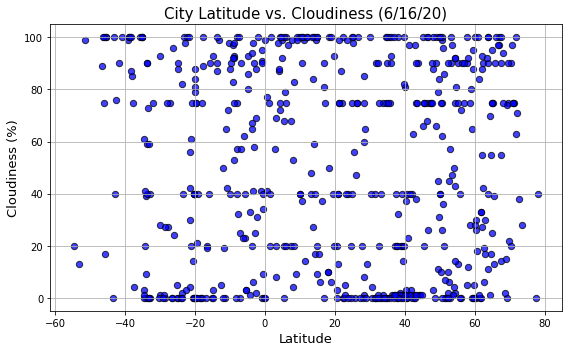

In [35]:
x_lat = city_weather_df['Lat']
y_cloud = city_weather_df['Cloudiness']
plt.figure(figsize=(8,5))
plt.scatter(x_lat, y_cloud, marker="o", facecolors="blue", edgecolors="black",s=40, alpha=.75)
plt.title('City Latitude vs. Cloudiness (6/16/20)',fontsize=15)
plt.xlabel('Latitude',fontsize=13)
plt.ylabel('Cloudiness (%)',fontsize=13)
plt.grid()
plt.tight_layout()
plt.show()

This scatter plot shows the relationship between cities' latitude and the cloudiness observed on the call data date.  From the graph we can see cities across all latitudes can have cloudiness ranging from 0 to 100% and no distinguishable trend similar to lat vs max temp.

## Latitude vs. Wind Speed Plot

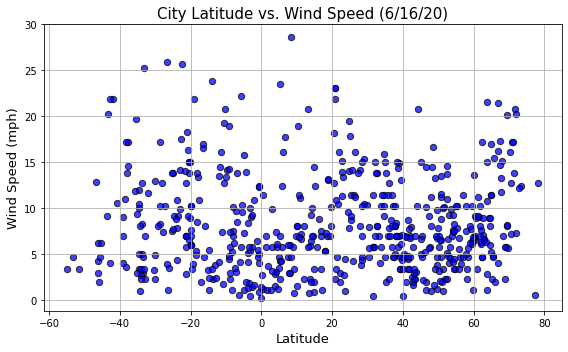

In [36]:
x_lat = city_weather_df['Lat']
y_wndspd = city_weather_df['Wind Speed']
plt.figure(figsize=(8,5))
plt.scatter(x_lat, y_wndspd, marker="o", facecolors="blue", edgecolors="black",s=40, alpha=.75)
plt.title('City Latitude vs. Wind Speed (6/16/20)',fontsize=15)
plt.xlabel('Latitude',fontsize=13)
plt.ylabel('Wind Speed (mph)',fontsize=13)
plt.grid()
plt.tight_layout()
plt.show()

Scatter plot showing the relationship of cities' latitude to wind speed on the observation date.  A majority of cities across all latitudes show speeds lower than 15 mph, with higher wind speeds ranging from 15 to 25 mph observed at cities across most of the latitude spectrum.  Highest windspeed close to 30 mph is seen closest to the equator, though, at ~10 degrees latitude.  This makes sense as it could be observed in a city seeing tropical storm/disturbance activity this time of year.

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [38]:
# Create Northern and Southern Hemisphere DataFrames - check counts to be sure all cities showing - total of 574
northern_df = city_weather_df.loc[city_weather_df['Lat'] > 0]
print(northern_df.count())

southern_df = city_weather_df.loc[city_weather_df['Lat'] < 0]
print(southern_df.count())

City          384
Lat           384
Lng           384
Max Temp      384
Humidity      384
Cloudiness    384
Wind Speed    384
Country       384
Date          384
dtype: int64
City          190
Lat           190
Lng           190
Max Temp      190
Humidity      190
Cloudiness    190
Wind Speed    190
Country       190
Date          190
dtype: int64


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

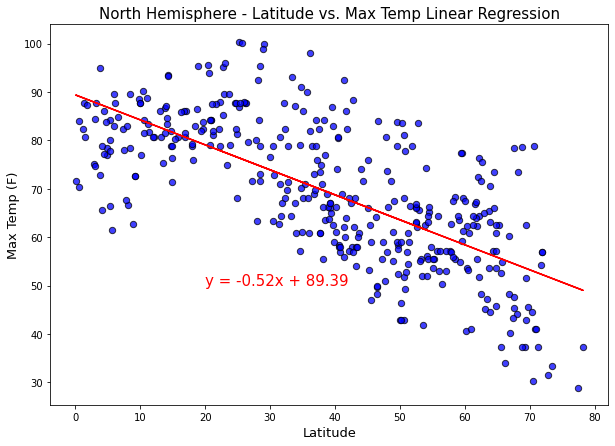

Correlation Coeficient (r) is: -0.7
The r-squared value is: 0.49


In [42]:
x_lat = northern_df['Lat']
y_temp = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_temp)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,7))
plt.scatter(x_lat, y_temp, marker="o", facecolors="blue", edgecolors="black",s=40, alpha=.75)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(20,50),fontsize=15,color="red")
plt.title('Northern Hemisphere - Latitude vs. Max Temp Linear Regression',fontsize=15)
plt.xlabel('Latitude',fontsize=13)
plt.ylabel('Max Temp (F)',fontsize=13)
plt.show()
print(f"Correlation Coeficient (r) is: {round(rvalue,2)}")
print(f"The r-squared value is: {round(rvalue**2,2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

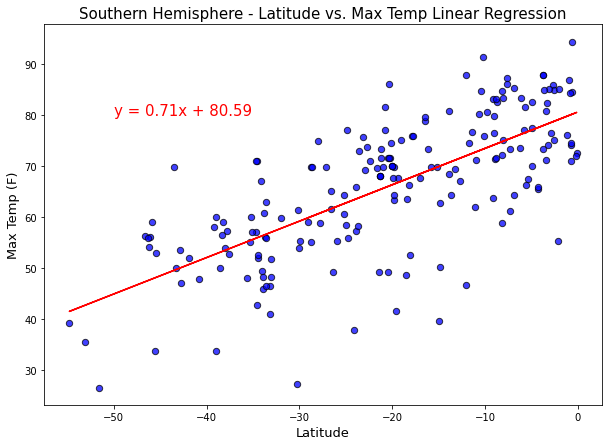

Correlation Coeficient (r) is: 0.71
The r-squared value is: 0.51


In [44]:
x_lat = southern_df['Lat']
y_temp = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_temp)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,7))
plt.scatter(x_lat, y_temp, marker="o", facecolors="blue", edgecolors="black",s=40, alpha=.75)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.title('Southern Hemisphere - Latitude vs. Max Temp Linear Regression',fontsize=15)
plt.xlabel('Latitude',fontsize=13)
plt.ylabel('Max Temp (F)',fontsize=13)
plt.show()
print(f"Correlation Coeficient (r) is: {round(rvalue,2)}")
print(f"The r-squared value is: {round(rvalue**2,2)}")

For both Northern and Souther Hemisphere relationship of Latitude vs. Max Temperature observed we're seeing a moderate/strong relationship given r squared values of .49 and .51 respectively.  Both suggest higher max temperatures occur the closer cities latitudes are to the equator.  At this time of year, the r-squares that accounts for at least half of why cities max temperatures are the way they are - with the other half accounted for by other variables.  It would be interesting to plot things like humidity, cloudiness, and wind speed versus the max temp to see if there are relationships there, too.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

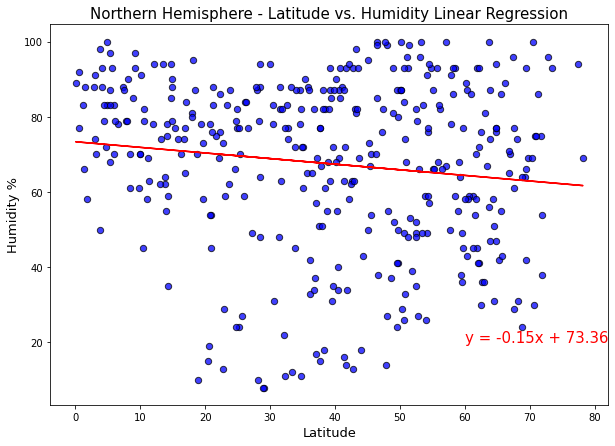

Correlation Coeficient (r) is: -0.13
The r-squared value is: 0.02


In [48]:
x_lat = northern_df['Lat']
y_hum = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_hum)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,7))
plt.scatter(x_lat, y_hum, marker="o", facecolors="blue", edgecolors="black",s=40, alpha=.75)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(60,20),fontsize=15,color="red")
plt.title('Northern Hemisphere - Latitude vs. Humidity Linear Regression',fontsize=15)
plt.xlabel('Latitude',fontsize=13)
plt.ylabel('Humidity %',fontsize=13)
plt.show()
print(f"Correlation Coeficient (r) is: {round(rvalue,2)}")
print(f"The r-squared value is: {round(rvalue**2,2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

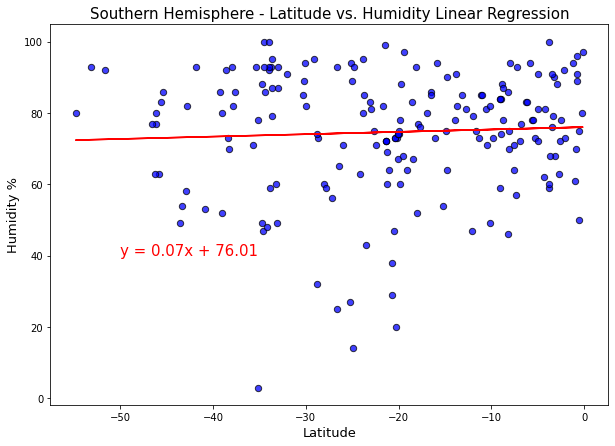

Correlation Coeficient (r) is: 0.05
The r-squared value is: 0.0


In [49]:
x_lat = southern_df['Lat']
y_hum = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_hum)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,7))
plt.scatter(x_lat, y_hum, marker="o", facecolors="blue", edgecolors="black",s=40, alpha=.75)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.title('Southern Hemisphere - Latitude vs. Humidity Linear Regression',fontsize=15)
plt.xlabel('Latitude',fontsize=13)
plt.ylabel('Humidity %',fontsize=13)
plt.show()
print(f"Correlation Coeficient (r) is: {round(rvalue,2)}")
print(f"The r-squared value is: {round(rvalue**2,2)}")

We're seeing almost no correlation in both Northern and Southern hemispheres between cities' latitude and humidity, with r-squares of .02 and 0 respectively.  Like we arrived at earlier in the total scatter plot across all latitudes, humidities seem to run the gamut in all zones.  The trend lines do rise ever so slightly as they approach 0 latitude though, which is to be expected as no humidities below 40% in those areas were observed.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

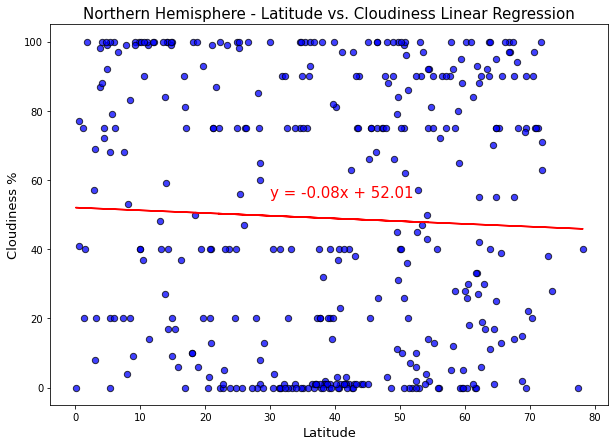

Correlation Coeficient (r) is: -0.04
The r-squared value is: 0.0


In [57]:
x_lat = northern_df['Lat']
y_cloud = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_cloud)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,7))
plt.scatter(x_lat, y_cloud, marker="o", facecolors="blue", edgecolors="black",s=40, alpha=.75)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(30,55),fontsize=15,color="red")
plt.title('Northern Hemisphere - Latitude vs. Cloudiness Linear Regression',fontsize=15)
plt.xlabel('Latitude',fontsize=13)
plt.ylabel('Cloudiness %',fontsize=13)
plt.show()
print(f"Correlation Coeficient (r) is: {round(rvalue,2)}")
print(f"The r-squared value is: {round(rvalue**2,2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

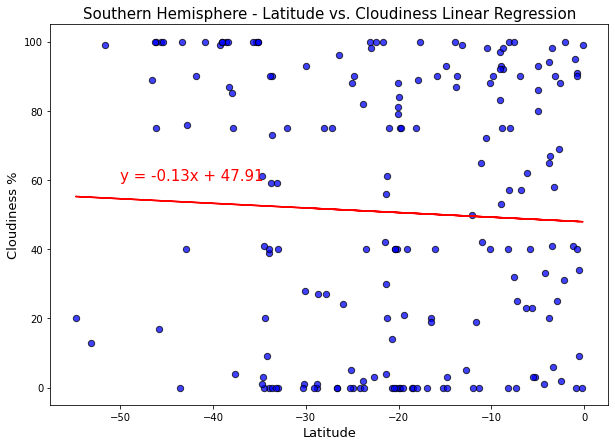

Correlation Coeficient (r) is: -0.05
The r-squared value is: 0.0


In [56]:
x_lat = southern_df['Lat']
y_cloud = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_cloud)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,7))
plt.scatter(x_lat, y_cloud, marker="o", facecolors="blue", edgecolors="black",s=40, alpha=.75)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.title('Southern Hemisphere - Latitude vs. Cloudiness Linear Regression',fontsize=15)
plt.xlabel('Latitude',fontsize=13)
plt.ylabel('Cloudiness %',fontsize=13)
plt.show()
print(f"Correlation Coeficient (r) is: {round(rvalue,2)}")
print(f"The r-squared value is: {round(rvalue**2,2)}")

Again, no correlation shown here between cities' latitude and cloudiness in both Northern and Southern hemispheres.  Both register r-squares of 0 for these variables and is similar to our assumptions based on the earlier scatter plot of all regions.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

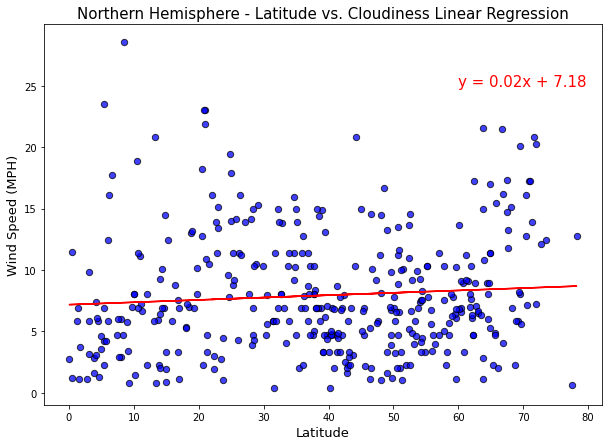

Correlation Coeficient (r) is: 0.08
The r-squared value is: 0.01


In [59]:
x_lat = northern_df['Lat']
y_wndspd = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_wndspd)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,7))
plt.scatter(x_lat, y_wndspd, marker="o", facecolors="blue", edgecolors="black",s=40, alpha=.75)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(60,25),fontsize=15,color="red")
plt.title('Northern Hemisphere - Latitude vs. Cloudiness Linear Regression',fontsize=15)
plt.xlabel('Latitude',fontsize=13)
plt.ylabel('Wind Speed (MPH)',fontsize=13)
plt.show()
print(f"Correlation Coeficient (r) is: {round(rvalue,2)}")
print(f"The r-squared value is: {round(rvalue**2,2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

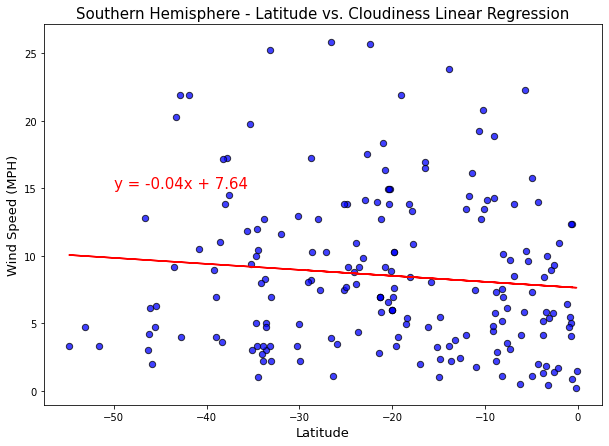

Correlation Coeficient (r) is: -0.1
The r-squared value is: 0.01


In [62]:
x_lat = southern_df['Lat']
y_wndspd = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_wndspd)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,7))
plt.scatter(x_lat, y_wndspd, marker="o", facecolors="blue", edgecolors="black",s=40, alpha=.75)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.title('Southern Hemisphere - Latitude vs. Cloudiness Linear Regression',fontsize=15)
plt.xlabel('Latitude',fontsize=13)
plt.ylabel('Wind Speed (MPH)',fontsize=13)
plt.show()
print(f"Correlation Coeficient (r) is: {round(rvalue,2)}")
print(f"The r-squared value is: {round(rvalue**2,2)}")

Though we observed our highest wind speed closer to the equator on the Northern Hemisphere side, our trend lines indicate higher wind speeds trending further away from the poles.  This is likely where warmer and colder air/pressure zones tend to meet and create a greater overall wind speeds, but again, the relationship between latitudes and wind speed is negligible with both hemispheres showing r-squares of 0.01.  Again, wind speed, like cloudiness and humidity, can run a broad range of values at all latitudes. 